In [5]:
# Imports
import matplotlib.pyplot as plt
import random, pdb
import numpy as np
import tensorflow as tf
import time
import pandas as pd

#svm imports
from sklearn import svm
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline

#Neural net import
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV

#Linear classifier
from sklearn.linear_model import LogisticRegression

# Random forest classifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.datasets.samples_generator import make_blobs
from mpl_toolkits.mplot3d import axes3d, Axes3D

# SYNTHETIC DATA CREATED USING BLOB

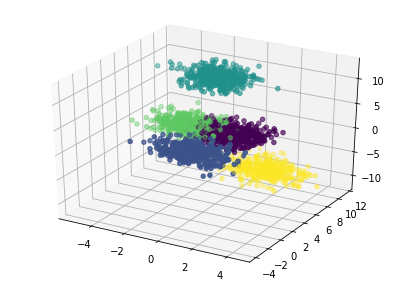

In [6]:
# Synthetic data using BLOB 
X, y = make_blobs(n_samples=2000, centers=5, n_features=3, random_state=0)
fig = plt.figure(figsize=(7, 5))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:,0], X[:,1], X[:,2], c=y)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

# Neural Net algorithm using MLP Classifier

In [7]:
#Single Neural Net setting
neural_net = MLPClassifier(activation="logistic", solver="sgd", hidden_layer_sizes=(100, 150), random_state=1)
neural_net.fit(X_train, y_train)
neural_net.score(X_test,y_test)

c:\users\nikhi\appdata\local\conda\conda\envs\ml-class\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.8216666666666667

In [10]:
## Learning rate, hidden layers & their sizes, activation function
parameters = {
    'activation': ['logistic'],
    'solver': ['sgd'],
    'max_iter': [100],
    'learning_rate_init': [0.001, 0.01, 0.1, 1],
    'hidden_layer_sizes': np.arange(2,8)
}
grid_nn = GridSearchCV(MLPClassifier(), parameters, n_jobs=-1, cv=5, return_train_score=True) # using all processors n_jobs=-1 (multicores)
grid_nn.fit(X_train, y_train)
print(grid_nn.score(X_test, y_test))
print(grid_nn.best_params_)

c:\users\nikhi\appdata\local\conda\conda\envs\ml-class\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


0.995
{'activation': 'logistic', 'hidden_layer_sizes': 6, 'learning_rate_init': 0.1, 'max_iter': 100, 'solver': 'sgd'}


c:\users\nikhi\appdata\local\conda\conda\envs\ml-class\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [15]:
df = pd.DataFrame(grid_nn.cv_results_)
df[['param_learning_rate_init','param_hidden_layer_sizes', 'mean_fit_time', 'mean_test_score']]

,param_learning_rate_init,param_hidden_layer_sizes,mean_fit_time,mean_test_score
0,0.001,2,0.260106,0.422143
1,0.01,2,0.275663,0.698571
2,0.1,2,0.295013,0.910714
3,1,2,0.090159,0.617857
4,0.001,3,0.286833,0.607857
5,0.01,3,0.309177,0.876429
6,0.1,3,0.287232,0.978571
7,1,3,0.069817,0.758571
8,0.001,4,0.324525,0.663571
9,0.01,4,0.288229,0.939286


#  SVM algorithm using SVC Classifier

In [17]:
# Grid search for SVC on BLOB data
parameters = {
    'kernel': ['poly', 'rbf', 'sigmoid'],
    'C':[0.001, 0.1, 10],
    'gamma':[10,1,0.1,0.01]
}
grid_svc = GridSearchCV(svm.SVC(), param_grid=parameters, cv=2, n_jobs=-1)


grid_svc.fit(X_train, y_train)
print(grid_svc.score(X_test, y_test))
print(grid_svc.best_params_)

0.9866666666666667
{'C': 0.001, 'gamma': 1, 'kernel': 'poly'}


c:\users\nikhi\appdata\local\conda\conda\envs\ml-class\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


In [20]:
df = pd.DataFrame(grid_svc.cv_results_)
df[['param_gamma','param_C', 'param_kernel', 'mean_fit_time', 'mean_test_score']]

,param_gamma,param_C,param_kernel,mean_fit_time,mean_test_score
0,10,0.001,poly,0.037400,0.987143
1,10,0.001,rbf,0.040390,0.294286
2,10,0.001,sigmoid,0.018449,0.314286
3,1,0.001,poly,0.002493,0.994286
4,1,0.001,rbf,0.025431,0.312143
5,1,0.001,sigmoid,0.027428,0.314286
6,0.1,0.001,poly,0.004489,0.922143
7,0.1,0.001,rbf,0.026427,0.314286
8,0.1,0.001,sigmoid,0.028425,0.314286
9,0.01,0.001,poly,0.008976,0.250714


# Random Forest algorithm using Random Forest Classifier

In [23]:
# Random Forests, grid search to find best parameter and run cross validation
parameters = {
    'n_estimators': [60,80,100],
    'max_depth': [int(x) for x in np.linspace(10, 110, num = 11)]
}
grid_rfc = GridSearchCV(RandomForestClassifier(), param_grid=parameters, cv=2, n_jobs=-1, return_train_score=True)
grid_rfc.fit(X_train, y_train)
print(grid_rfc.score(X_test, y_test))
print(grid_rfc.best_params_)

0.9883333333333333
{'max_depth': 40, 'n_estimators': 60}


In [24]:
df = pd.DataFrame(grid_rfc.cv_results_)
df[['param_n_estimators','param_max_depth', 'mean_fit_time', 'mean_test_score']]

,param_n_estimators,param_max_depth,mean_fit_time,mean_test_score
0,60,10,0.081780,0.985000
1,80,10,0.108211,0.987143
2,100,10,0.139128,0.990000
3,60,20,0.087267,0.985714
4,80,20,0.100730,0.990000
5,100,20,0.125165,0.989286
6,60,30,0.076795,0.990000
7,80,30,0.107712,0.990000
8,100,30,0.122672,0.988571
9,60,40,0.074301,0.990714


# Logistic Regression algorithm using Logistic Regression Classifier

In [29]:
# Linear Classifier
parameters = {
    'solver': ['sag', 'lbfgs'],
    'multi_class': ['ovr']
}
grid_lr = GridSearchCV(LogisticRegression(), param_grid=parameters, cv=2, n_jobs=-1, return_train_score=True)

lc = LogisticRegression(solver='sag', multi_class='ovr')

grid_lr.fit(X_train, y_train)
print(grid_lr.score(X_test, y_test))
print(grid_lr.best_params_)

0.9833333333333333
{'multi_class': 'ovr', 'solver': 'sag'}


c:\users\nikhi\appdata\local\conda\conda\envs\ml-class\lib\site-packages\sklearn\linear_model\sag.py:334: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


In [30]:
df = pd.DataFrame(grid_lr.cv_results_)
df[['param_solver','param_multi_class', 'mean_fit_time', 'mean_test_score']]

,param_solver,param_multi_class,mean_fit_time,mean_test_score
0,sag,ovr,0.075335,0.974286
1,lbfgs,ovr,0.020446,0.974286
